# Introduction
It is now possible to collect a large amount of data about personal movement using activity monitoring devices such as a Fitbit, Nike Fuelband, or Jawbone Up. These type of devices are part of the “quantified self” movement - a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. But these data remain under-utilized both because the raw data are hard to obtain and there is a lack of statistical methods and software for processing and interpreting the data.

This assignment makes use of data from a personal activity monitoring device. This device collects data at 5 minute intervals through out the day. The data consists of two months of data from an anonymous individual collected during the months of October and November, 2012 and include the number of steps taken in 5 minute intervals each day.

Data
The data for this assignment can be downloaded from the course web site:

Dataset: Activity monitoring data [52K]
The variables included in this dataset are:

steps: Number of steps taking in a 5-minute interval (missing values are coded as NA)

date: The date on which the measurement was taken in YYYY-MM-DD format

interval: Identifier for the 5-minute interval in which measurement was taken

The dataset is stored in a comma-separated-value (CSV) file and there are a total of 17,568 observations in this dataset.

## Solution
Setting global options and loading required libraries

In [1]:
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("data.table")
install.packages("knitr")

also installing the dependencies 'xfun', 'tinytex', 'cli', 'rlang', 'rmarkdown', 'googlesheets4', 'reprex'




  There are binary versions available but the source versions are later:
              binary source needs_compilation
xfun            0.22   0.28              TRUE
tinytex         0.31   0.35             FALSE
cli            2.5.0  3.1.0              TRUE
rlang         0.4.11 0.4.12              TRUE
rmarkdown        2.8   2.11             FALSE
googlesheets4  0.3.0  1.0.0             FALSE
reprex         2.0.0  2.0.1             FALSE

  Binaries will be installed
package 'xfun' successfully unpacked and MD5 sums checked
package 'cli' successfully unpacked and MD5 sums checked
package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problem copying C:\Users\nytro\anaconda3\Lib\R\library\00LOCK\rlang\libs\x64\rlang.dll to C:\Users\nytro\anaconda3\Lib\R\library\rlang\libs\x64\rlang.dll: Permission denied"Warning message:
"restored 'rlang'"

package 'tidyverse' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nytro\AppData\Local\Temp\Rtmp6VNULo\downloaded_packages


installing the source packages 'tinytex', 'rmarkdown', 'googlesheets4', 'reprex'

Warning message in install.packages("tidyverse"):
"installation of package 'tinytex' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'googlesheets4' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'rmarkdown' had non-zero exit status"Warning message in install.packages("tidyverse"):
"installation of package 'reprex' had non-zero exit status"


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'




  There is a binary version available but the source version is later:
           binary source needs_compilation
data.table 1.14.0 1.14.2              TRUE

  Binaries will be installed
package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\nytro\AppData\Local\Temp\Rtmp6VNULo\downloaded_packages

  There is a binary version available but the source version is later:
      binary source needs_compilation
knitr   1.33   1.36             FALSE



installing the source package 'knitr'



In [2]:
library(knitr)
library(ggplot2)
library(data.table)
library(dplyr)
opts_chunk$set(echo = TRUE, results = 'hold')

Warning message:
"package 'data.table' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:data.table':

    between, first, last

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



## Loading the data

In [13]:
if(!file.exists("./data")){dir.create("./data")}
fileUrl <- "https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip"
download.file(fileUrl,destfile="./data/activity.zip",method="curl")
unzip(zipfile="./data/activity.zip",exdir="./data")
activity <- read.csv("./data/activity.csv")
activity$date <- as.Date(activity$date)
activity$interval <- as.factor(activity$interval)

In [14]:
head(activity, 10)

steps,date,interval
NA,2012-10-01,0
NA,2012-10-01,5
NA,2012-10-01,10
NA,2012-10-01,15
NA,2012-10-01,20
NA,2012-10-01,25
NA,2012-10-01,30
NA,2012-10-01,35
NA,2012-10-01,40
NA,2012-10-01,45


## Process the data

### What is mean total number of steps taken per day?
1. Calculate the total number of steps taken per day

In [5]:
steps_per_day <- aggregate(steps ~ date, data=activity, FUN=sum)
colnames(steps_per_day) <- c("date", "steps")

In [6]:
head(steps_per_day, 10)

date,steps
2012-10-02,126
2012-10-03,11352
2012-10-04,12116
2012-10-05,13294
2012-10-06,15420
2012-10-07,11015
2012-10-09,12811
2012-10-10,9900
2012-10-11,10304
2012-10-12,17382


2. Make a histogram of the total number of steps taken each day

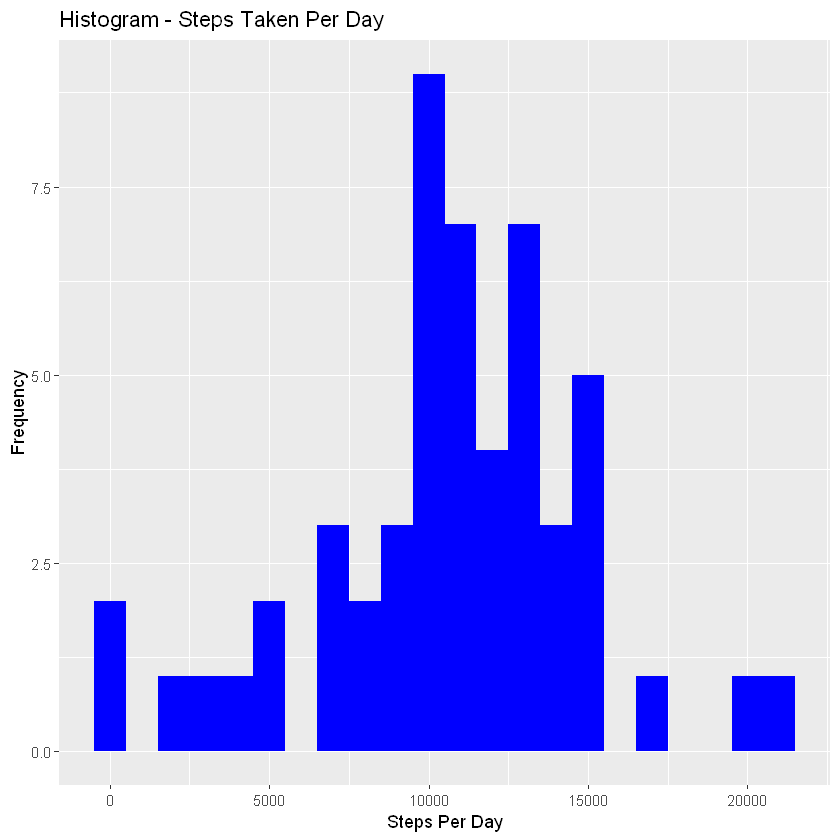

In [8]:
ggplot(steps_per_day, aes(x = steps)) + 
  geom_histogram(fill = "blue", binwidth = 1000) + 
  labs(title = "Histogram - Steps Taken Per Day", x = "Steps Per Day", y = "Frequency")

3. Calculate and report the mean and median of the total number of steps taken per day

In [10]:
mean_steps_per_day <- mean(steps_per_day$steps)
mean_steps_per_day
median_steps_per_day <- median(steps_per_day$steps)
median_steps_per_day

[1] 10766.19

[1] 10765

### What is the average daily activity pattern?
1. Make a time series plot (i.e. type = “l”) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all days (y-axis)

In [15]:
steps_per_interval <- aggregate(steps ~ interval, data = activity, FUN = mean, na.rm = TRUE)
steps_per_interval$interval <- as.integer(levels(steps_per_interval$interval)[steps_per_interval$interval])
colnames(steps_per_interval) <- c("interval", "steps")

In [16]:
head(steps_per_interval, 10)

interval,steps
0,1.7169811
5,0.3396226
10,0.1320755
15,0.1509434
20,0.0754717
25,2.0943396
30,0.5283019
35,0.8679245
40,0.0000000
45,1.4716981


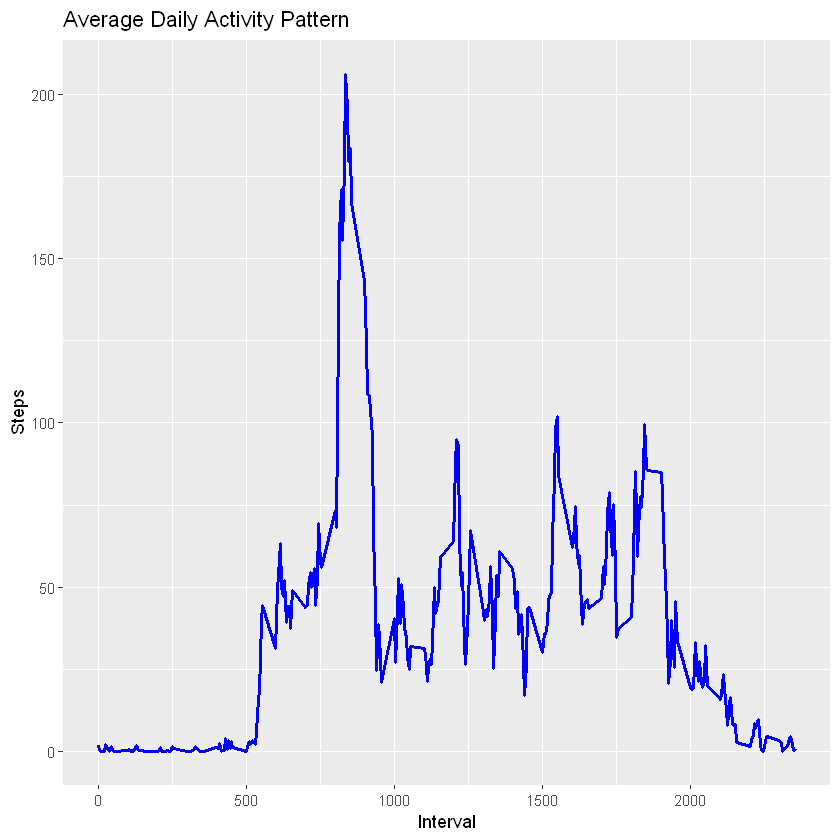

In [17]:
ggplot(steps_per_interval, aes(x = interval, y = steps)) + 
  geom_line(col = "blue", size = 1) + 
  labs(title = "Average Daily Activity Pattern", x = "Interval", y = "Steps")

2. Which 5-minute interval, on average across all the days in the dataset, contains the maximum number of steps?

In [18]:
max_interval <- steps_per_interval[which.max(steps_per_interval$steps),]
max_interval

,interval,steps
104,835,206.1698


## Imputing missing values
1. Calculate and report the total number of missing values in the dataset (i.e. the total number of rows with NAs)

In [20]:
missing_values <- sum(is.na(activity$steps))
missing_values

[1] 2304

2. Devise a strategy for filling in all of the missing values in the dataset. The strategy does not need to be sophisticated. For example, you could use the mean/median for that day, or the mean for that 5-minute interval, etc.


To populate missing values, we choose to replace them with the mean value at the same interval across days.

3. Create a new dataset that is equal to the original dataset but with the missing data filled in.

In [21]:
new_act_data <- activity
index_of_na <- which(is.na(new_act_data$steps))
for (i in index_of_na) {
  new_act_data$steps[i] <- with(steps_per_interval, steps[interval = new_act_data$interval[i]])
}

In [22]:
head(new_act_data, 10)

steps,date,interval
1.7169811,2012-10-01,0
0.3396226,2012-10-01,5
0.1320755,2012-10-01,10
0.1509434,2012-10-01,15
0.0754717,2012-10-01,20
2.0943396,2012-10-01,25
0.5283019,2012-10-01,30
0.8679245,2012-10-01,35
0.0000000,2012-10-01,40
1.4716981,2012-10-01,45


In [23]:
new_missing_values <- sum(is.na(new_act_data$steps))
new_missing_values

[1] 0

4. Make a histogram of the total number of steps taken each day and Calculate and report the mean and median total number of steps taken per day. Do these values differ from the estimates from the first part of the assignment? What is the impact of imputing missing data on the estimates of the total daily number of steps?

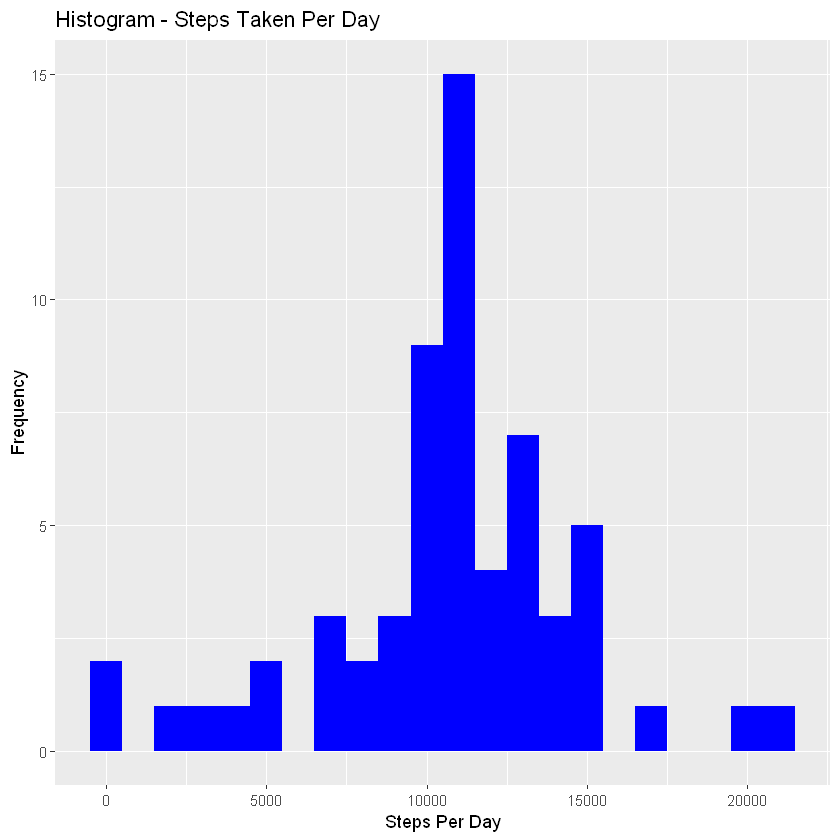

In [24]:
new_steps_per_day <- aggregate(steps ~ date, data = new_act_data, FUN=sum)
colnames(new_steps_per_day) <- c("date", "steps")
ggplot(new_steps_per_day, aes(x = steps)) + 
  geom_histogram(fill = "blue", binwidth = 1000) + 
  labs(title = "Histogram - Steps Taken Per Day", x = "Steps Per Day", y = "Frequency")

In [25]:
new_mean_steps_per_day <- mean(new_steps_per_day$steps)
new_mean_steps_per_day
new_median_steps_per_day <- median(new_steps_per_day$steps)
new_median_steps_per_day

[1] 10766.19

[1] 10766.19

### Are there differences in activity patterns between weekdays and weekends?

1. Create a new factor variable in the dataset with two levels - “weekday” and “weekend” indicating whether a given date is a weekday or weekend day.

Let us first add a factor variable to identify the given date as Weekday or Weekend

In [26]:
dt <- data.table(new_act_data)
dt[, weekday := ifelse(weekdays(date) %in% c("Saturday", "Sunday"), "Weekend", "Weekday")]
dt$weekday <- as.factor(dt$weekday)
dt$interval <- as.integer(levels(dt$interval)[dt$interval])
head(dt, 10)

steps,date,interval,weekday
1.7169811,2012-10-01,0,Weekday
0.3396226,2012-10-01,5,Weekday
0.1320755,2012-10-01,10,Weekday
0.1509434,2012-10-01,15,Weekday
0.0754717,2012-10-01,20,Weekday
2.0943396,2012-10-01,25,Weekday
0.5283019,2012-10-01,30,Weekday
0.8679245,2012-10-01,35,Weekday
0.0000000,2012-10-01,40,Weekday
1.4716981,2012-10-01,45,Weekday


2. Make a panel plot containing a time series plot (i.e. type = “l”) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all weekday days or weekend days (y-axis)

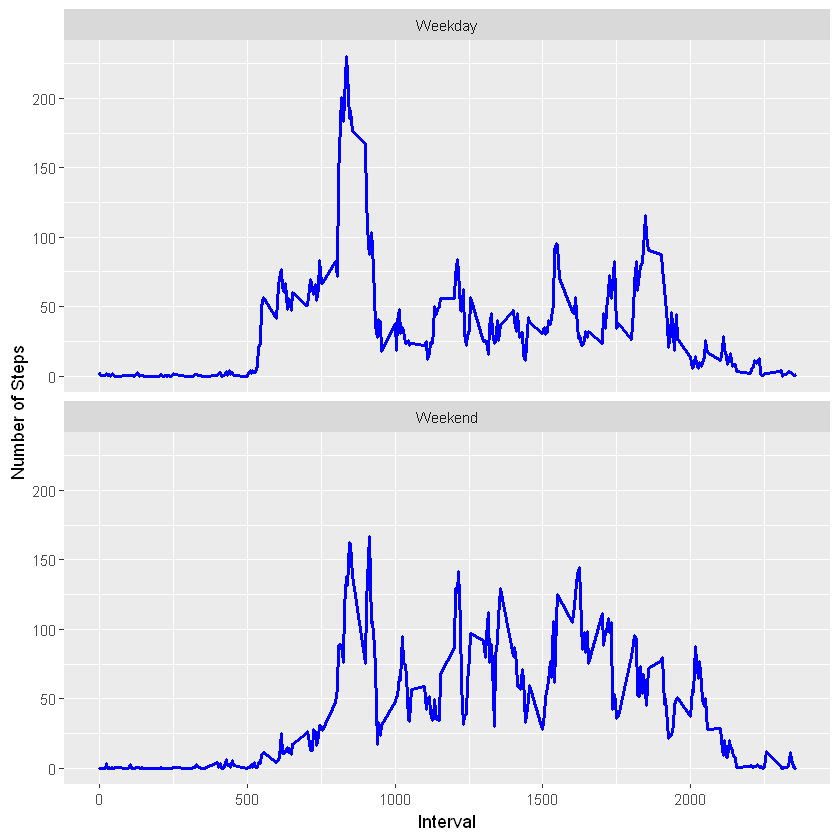

In [27]:
steps_per_weekday <- aggregate(steps ~ interval+weekday, data = dt, FUN = mean)
ggplot(steps_per_weekday, aes(x = interval, y = steps)) + 
  geom_line(col = "blue", size = 1) + 
  facet_wrap(~ weekday, nrow=2, ncol=1) + 
  labs(x = "Interval", y = "Number of Steps")

Looking at the above graph we notice that the activity on weekdays has the highest peak (> 300) compared to all intervals and only one other peak that touches 100. On the contrary, weekend intervals have more peaks over a hundred than weekday. May be the person from whomever the data is collected is engaged in more active life style during weekends compared to weekdays.